The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


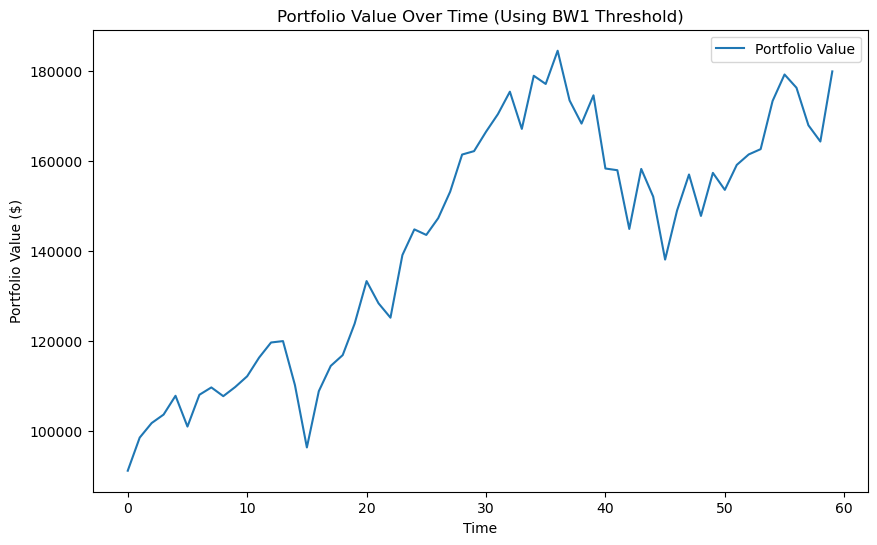

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (data['Trade Signal'].diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (data['Trade Signal'] == 1).sum()
num_large_cap = (data['Trade Signal'] == 0).sum()
total_periods = len(data['Trade Signal'])

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using BW1 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


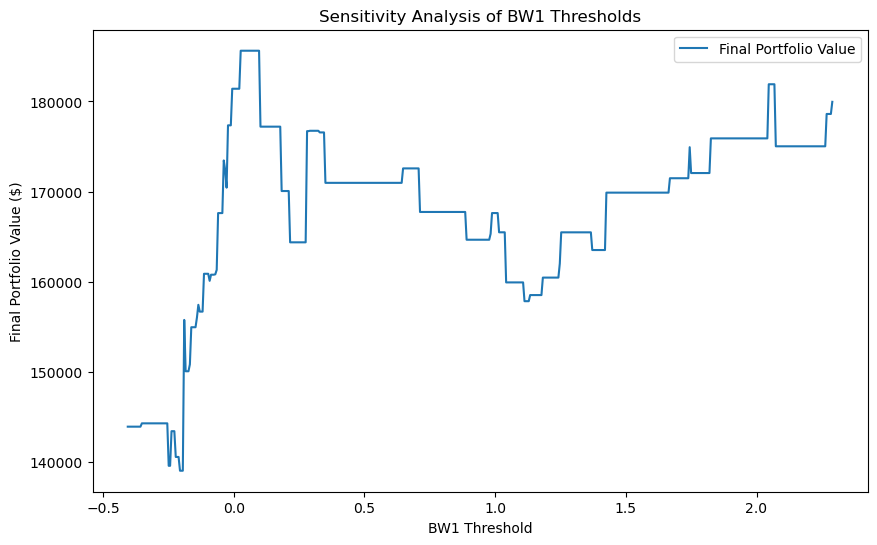

The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize lists to store the thresholds and corresponding portfolio values
threshold_list = []
portfolio_values = []

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Store the threshold and corresponding portfolio value
    threshold_list.append(threshold)
    portfolio_values.append(final_portfolio_value)

# Convert lists to numpy arrays for plotting
threshold_list = np.array(threshold_list)
portfolio_values = np.array(portfolio_values)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(threshold_list, portfolio_values, label='Final Portfolio Value')
plt.title('Sensitivity Analysis of BW1 Thresholds')
plt.xlabel('BW1 Threshold')
plt.ylabel('Final Portfolio Value ($)')
plt.legend()
plt.show()

# Print the best threshold and the corresponding portfolio value
best_index = np.argmax(portfolio_values)
best_threshold = threshold_list[best_index]
best_portfolio_value = portfolio_values[best_index]

print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Add the optimal threshold trade signals and portfolio value to the DataFrame
data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > best_threshold else 0)
data['Selected Return'] = data.apply(
    lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
data['Strategy Return'] = data['Selected Return']
data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()

# Export the relevant data to a new CSV file
data[['BW1', 'Trade Signal', 'Small Cap Return', 'Large Cap Return', 'Selected Return', 'Strategy Return', 'Portfolio Value']].to_csv("new_optimized_trading_strategy_BW1.csv", index=False)

print("Optimized trading strategy data has been exported to 'new_optimized_trading_strategy_BW1.csv'.")


The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
Optimized trading strategy data has been exported to 'new_optimized_trading_strategy_BW1.csv'.


The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


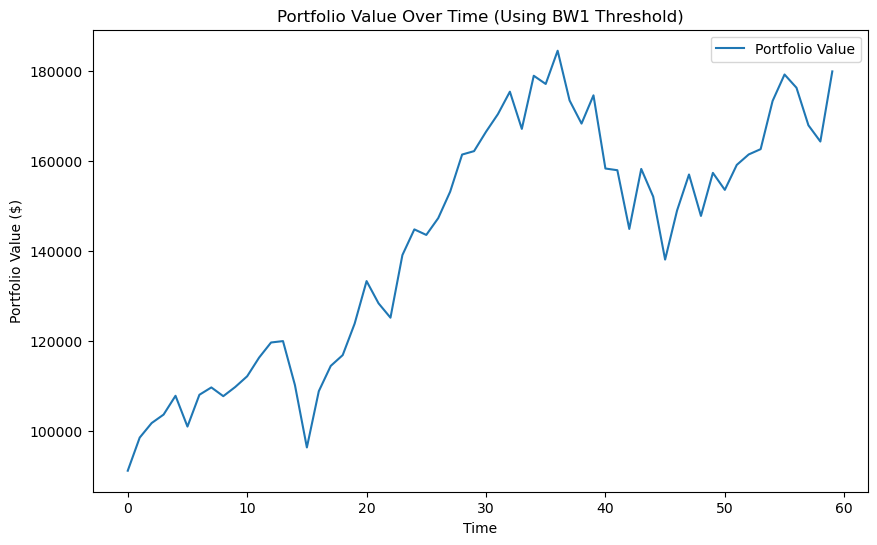

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using BW1 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()



The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


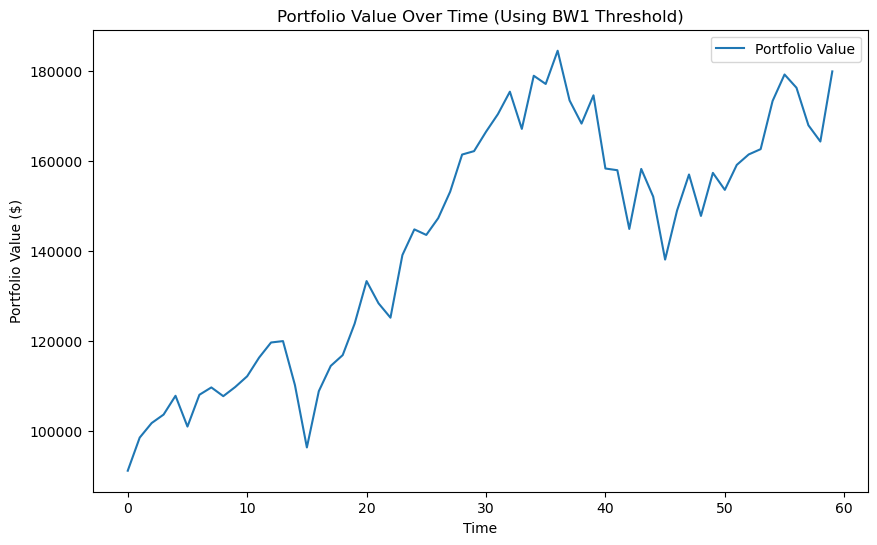

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time (Using BW1 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The trading strategy outperformed the buy-and-hold strategy.
The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


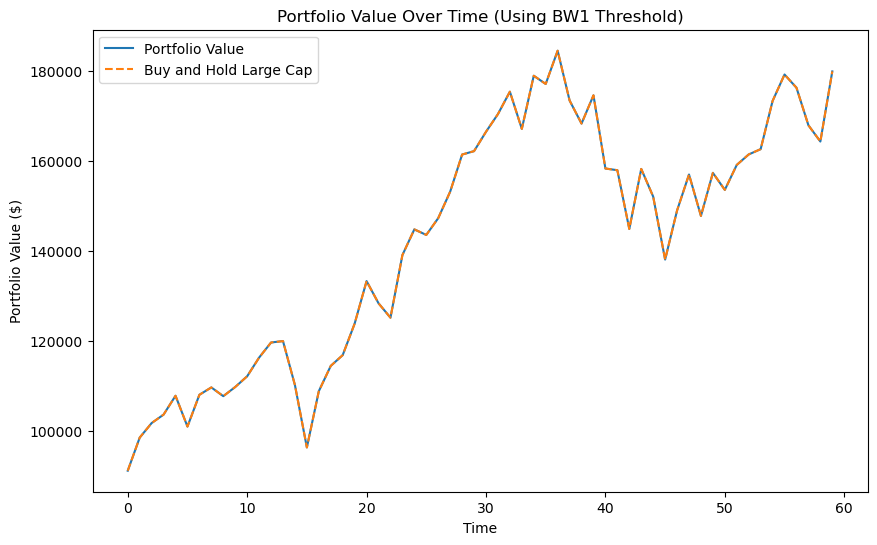

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_value = data['Buy and Hold'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Compare the best portfolio value with the buy-and-hold strategy
if best_portfolio_value < buy_and_hold_value:
    best_portfolio_value = buy_and_hold_value
    best_trade_signals = pd.Series([0] * len(data), index=data.index)
    print("The buy-and-hold strategy for Large Cap Return outperformed the trading strategy.")
else:
    print("The trading strategy outperformed the buy-and-hold strategy.")

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Portfolio Value')
plt.plot(data['Buy and Hold'], label='Buy and Hold Large Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using BW1 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


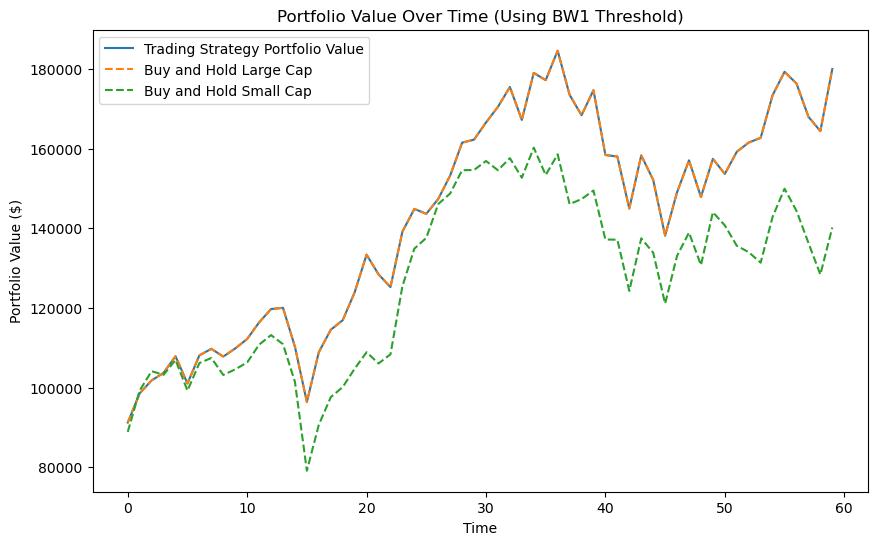

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW1 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using BW1 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for BW2 is: 0.29
The final portfolio value using the best threshold is: $182974.58
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 6
The portfolio was invested in Small Cap returns for 28 periods (46.67% of the time).
The portfolio was invested in Large Cap returns for 32 periods (53.33% of the time).


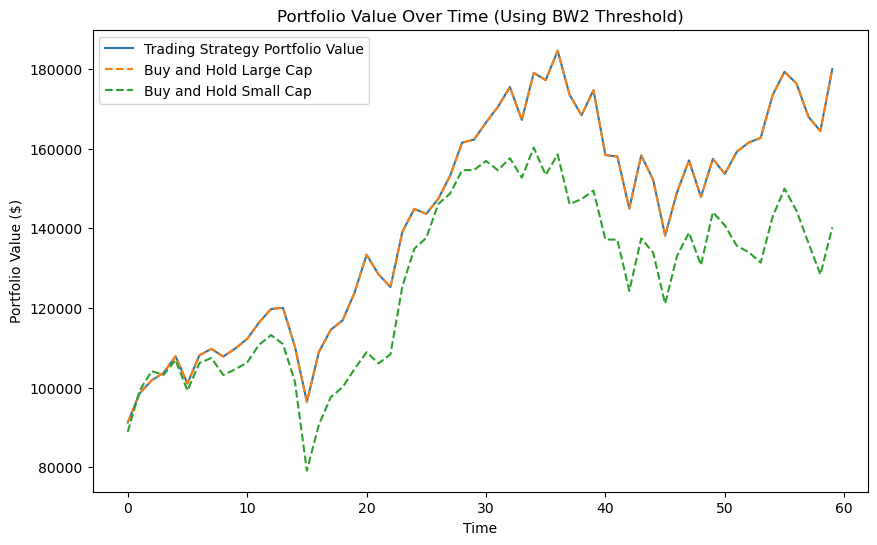

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW2'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW2'] = data['BW2'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['BW2'].min(), data['BW2'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW2 value
    data['Trade Signal'] = data['BW2'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for BW2 is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using BW2 Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for VIX is: 21.86
The final portfolio value using the best threshold is: $199640.35
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 23 periods (38.33% of the time).
The portfolio was invested in Large Cap returns for 37 periods (61.67% of the time).


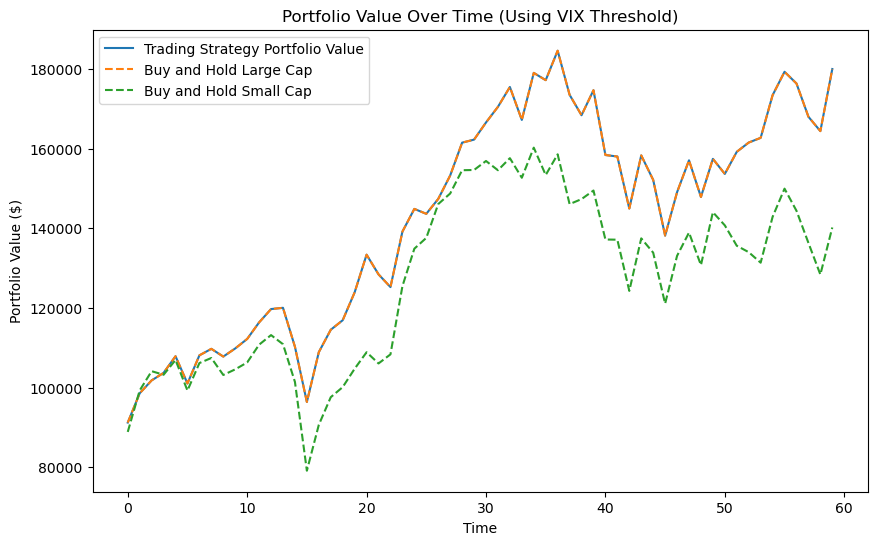

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'VIX'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['VIX'] = data['VIX'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['VIX'].min(), data['VIX'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's VIX value
    data['Trade Signal'] = data['VIX'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for VIX is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using VIX Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for VIX is: 21.86
The final portfolio value using the best threshold is: $199640.35
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 23 periods (38.33% of the time).
The portfolio was invested in Large Cap returns for 37 periods (61.67% of the time).


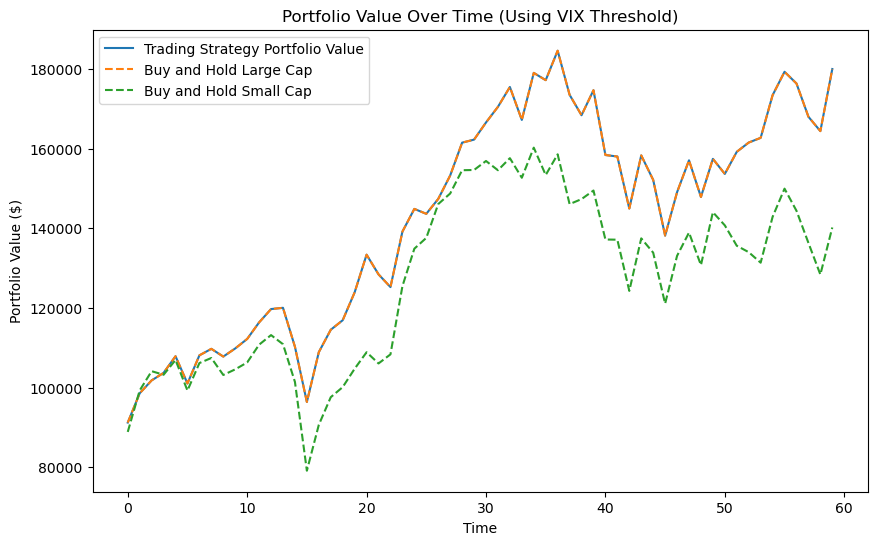

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'VIX'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['VIX'] = data['VIX'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['VIX'].min(), data['VIX'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's VIX value
    data['Trade Signal'] = data['VIX'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for VIX is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using VIX Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for EPU is: 190.85
The final portfolio value using the best threshold is: $193716.11
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 12 periods (20.00% of the time).
The portfolio was invested in Large Cap returns for 48 periods (80.00% of the time).


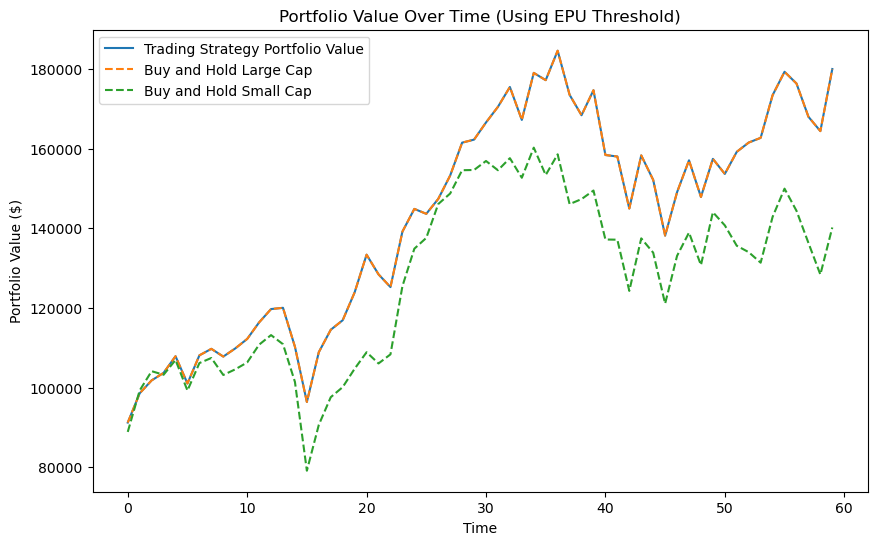

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'EPU'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['EPU'] = data['EPU'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['EPU'].min(), data['EPU'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's EPU value
    data['Trade Signal'] = data['EPU'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for EPU is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using EPU Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for STLFSI is: 3.85
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


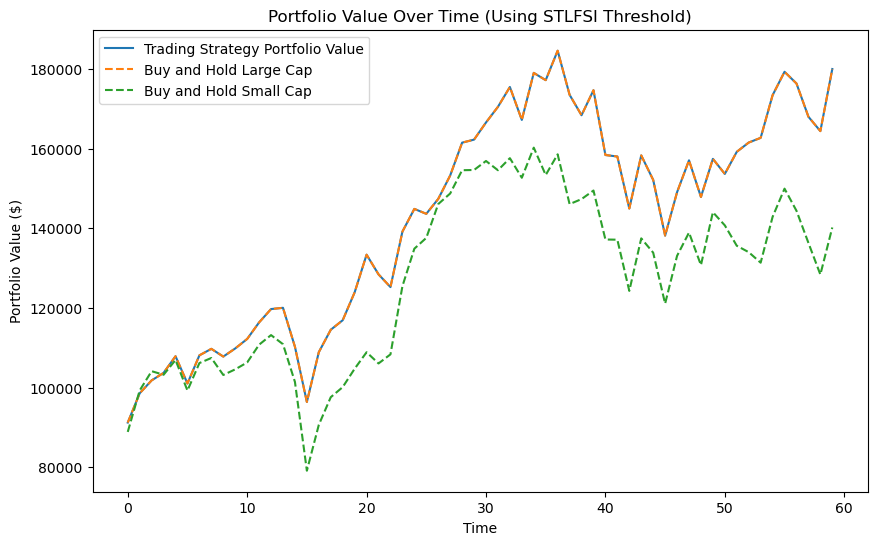

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'STLFSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['STLFSI'] = data['STLFSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['STLFSI'].min(), data['STLFSI'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's STLFSI value
    data['Trade Signal'] = data['STLFSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for STLFSI is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using STLFSI Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for CSI is: 101.00
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


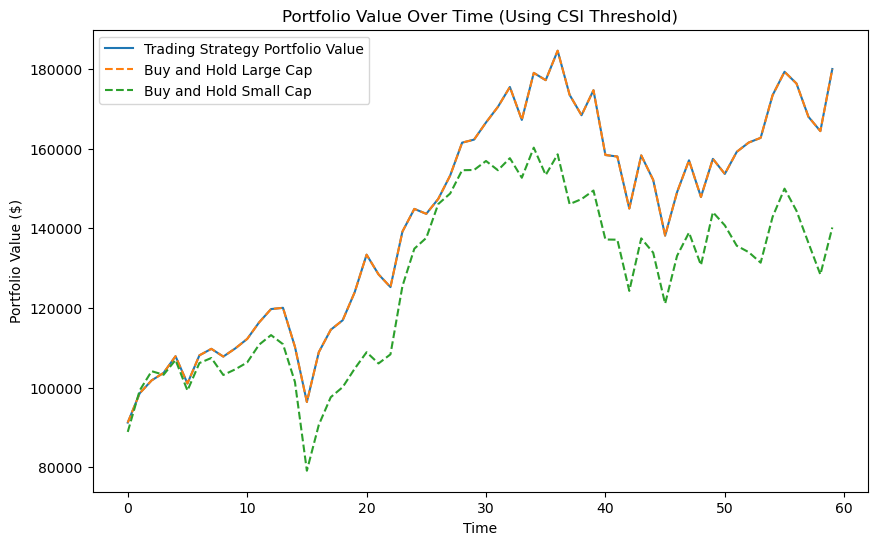

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'CSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['CSI'] = data['CSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['CSI'].min(), data['CSI'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's CSI value
    data['Trade Signal'] = data['CSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for CSI is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using CSI Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'Twitter'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['Twitter'] = data['Twitter'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['Twitter'].min(), data['Twitter'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's Twitter value
    data['Trade Signal'] = data['Twitter'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for Twitter is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using Twitter Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


KeyError: ['Twitter']

The best threshold for TWITTER is: 255.16
The final portfolio value using the best threshold is: $176074.53
Final portfolio value if only Large Cap Return was held: $159186.52
Final portfolio value if only Small Cap Return was held: $135617.51
The number of binary signals generated by the trading strategy is: 52
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 11 periods (21.15% of the time).
The portfolio was invested in Large Cap returns for 41 periods (78.85% of the time).


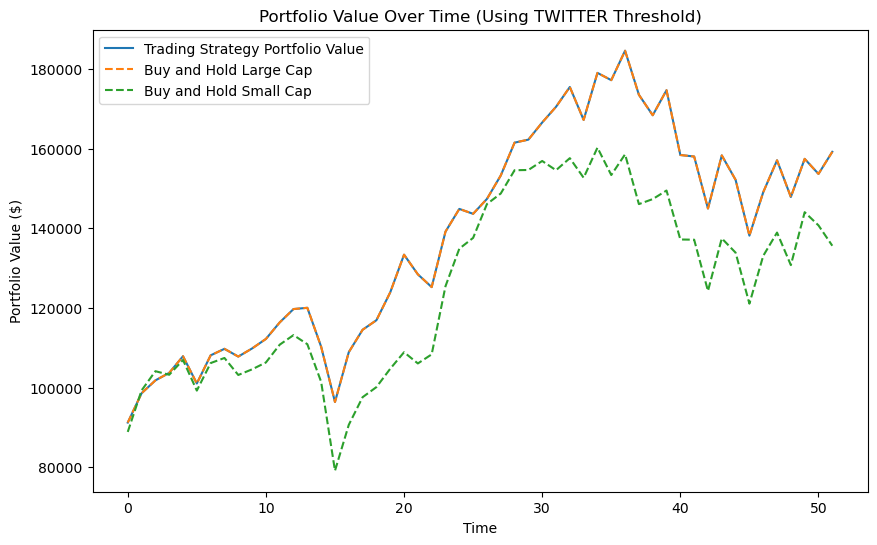

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'TWITTER'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['TWITTER'] = data['TWITTER'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['TWITTER'].min(), data['TWITTER'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's TWITTER value
    data['Trade Signal'] = data['TWITTER'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for TWITTER is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using TWITTER Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for SMB is: 0.004
The final portfolio value using the best threshold is: $266281.34
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 26
The portfolio was invested in Small Cap returns for 28 periods (46.67% of the time).
The portfolio was invested in Large Cap returns for 32 periods (53.33% of the time).


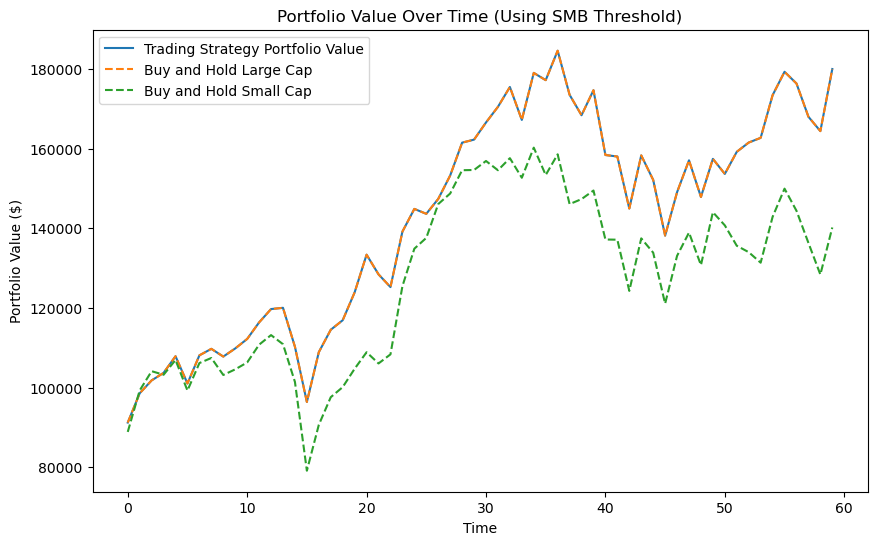

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'SMB'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['SMB'] = data['SMB'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['SMB'].min(), data['SMB'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's SMB value
    data['Trade Signal'] = data['SMB'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for SMB is: {best_threshold:.3f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using SMB Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for HML is: 1.76
The final portfolio value using the best threshold is: $217701.98
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 20
The portfolio was invested in Small Cap returns for 16 periods (26.67% of the time).
The portfolio was invested in Large Cap returns for 44 periods (73.33% of the time).


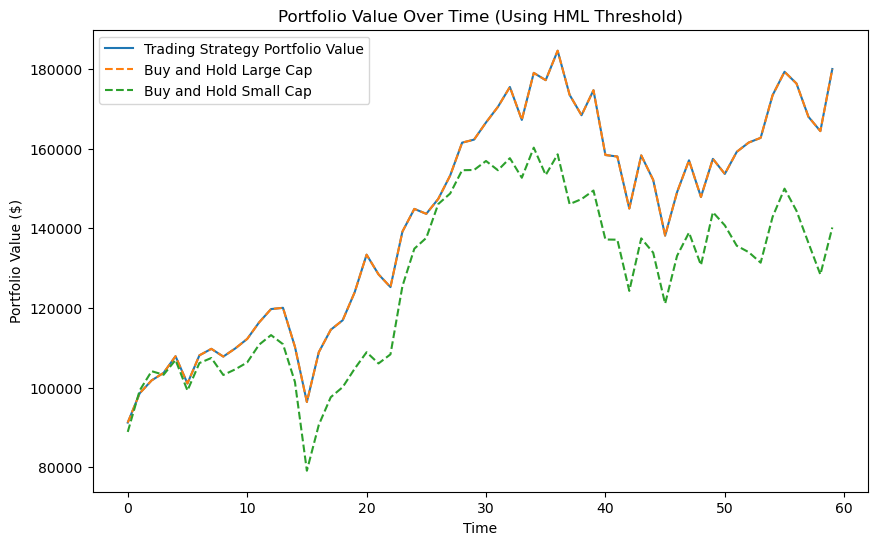

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'HML'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['HML'] = data['HML'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['HML'].min(), data['HML'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's HML value
    data['Trade Signal'] = data['HML'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for HML is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using HML Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


The best threshold for RF is: 0.47
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


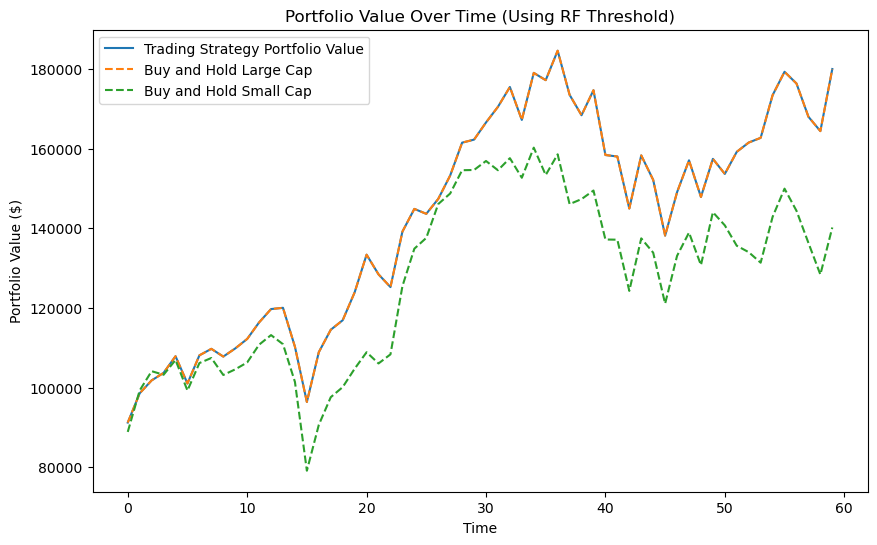

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['RF'].min(), data['RF'].max(), 500)

# Initialize variables to store the best threshold and corresponding portfolio value
best_threshold = None
best_portfolio_value = -np.inf
best_trade_signals = None

# Perform grid search to find the optimal threshold
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Update the best threshold and portfolio value if the current one is better
    if final_portfolio_value > best_portfolio_value:
        best_threshold = threshold
        best_portfolio_value = final_portfolio_value
        best_trade_signals = data['Trade Signal'].copy()

# Print the best threshold and the corresponding portfolio value
print(f"The best threshold for RF is: {best_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")

# Compare the best portfolio value with the buy-and-hold strategies
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

# Optionally, visualize the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(data['Portfolio Value'], label='Trading Strategy Portfolio Value')
plt.plot(data['Buy and Hold Large Cap'], label='Buy and Hold Large Cap', linestyle='--')
plt.plot(data['Buy and Hold Small Cap'], label='Buy and Hold Small Cap', linestyle='--')
plt.title('Portfolio Value Over Time (Using RF Threshold)')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()


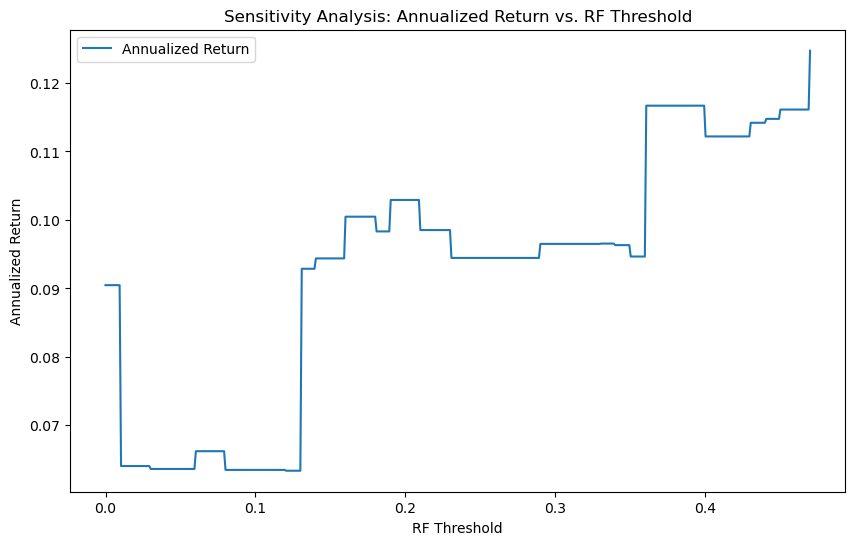

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['RF'].min(), data['RF'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(thresholds, annualized_returns, label='Annualized Return')
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold')
plt.xlabel('RF Threshold')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()


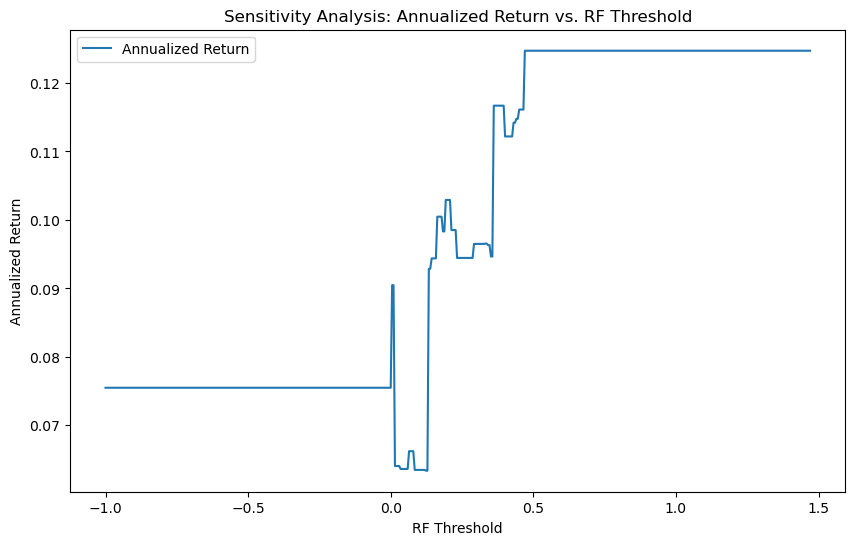

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test both in the negative and positive regions
thresholds = np.linspace(data['RF'].min() - 1, data['RF'].max() + 1, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(thresholds, annualized_returns, label='Annualized Return')
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold')
plt.xlabel('RF Threshold')
plt.ylabel('Annualized Return')
plt.legend()
plt.show()


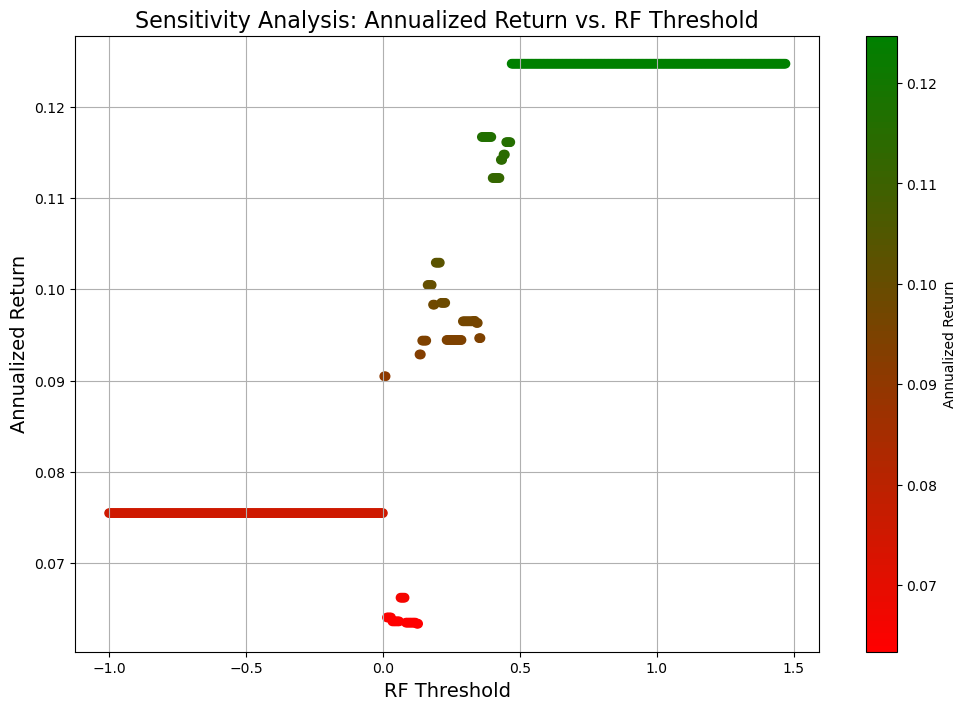

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test both in the negative and positive regions
thresholds = np.linspace(data['RF'].min() - 1, data['RF'].max() + 1, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(12, 8))

# Create a color map ranging from red to green
colors = [mcolors.to_rgba('red'), mcolors.to_rgba('green')]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_colormap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the returns for coloring
norm = mcolors.Normalize(vmin=min(annualized_returns), vmax=max(annualized_returns))

# Plot with a color gradient
sc = plt.scatter(thresholds, annualized_returns, c=annualized_returns, cmap=cm, norm=norm)
plt.colorbar(sc, label='Annualized Return')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold', fontsize=16)
plt.xlabel('RF Threshold', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.grid(True)
plt.show()


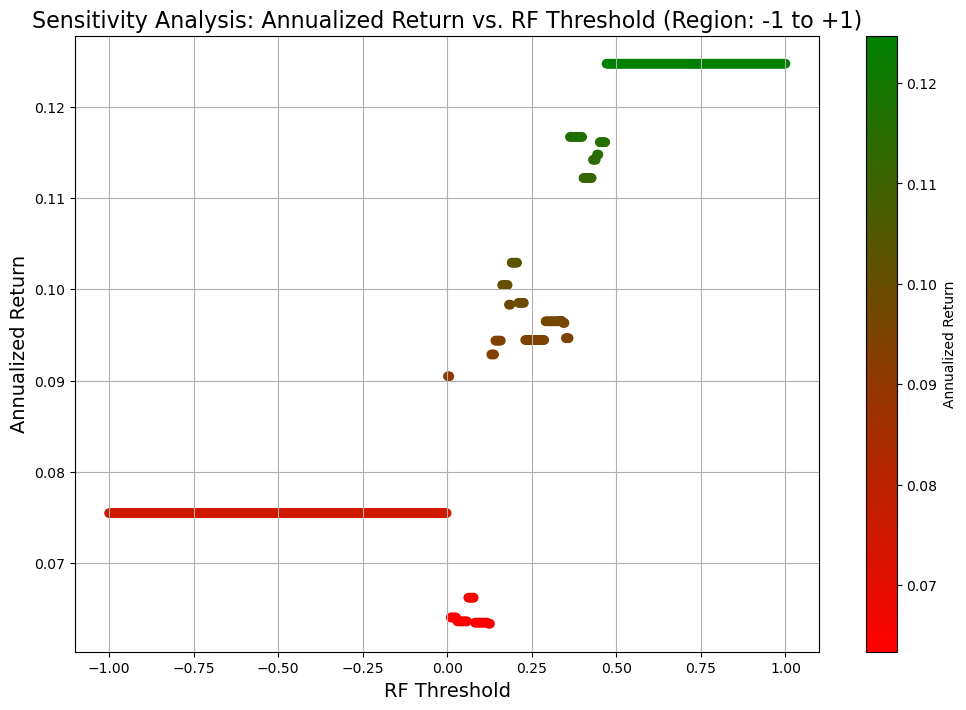

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Focus the range of thresholds to test between -1 and +1
thresholds = np.linspace(-1, 1, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(12, 8))

# Create a color map ranging from red to green
colors = [mcolors.to_rgba('red'), mcolors.to_rgba('green')]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_colormap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the returns for coloring
norm = mcolors.Normalize(vmin=min(annualized_returns), vmax=max(annualized_returns))

# Plot with a color gradient
sc = plt.scatter(thresholds, annualized_returns, c=annualized_returns, cmap=cm, norm=norm)
plt.colorbar(sc, label='Annualized Return')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold (Region: -1 to +1)', fontsize=16)
plt.xlabel('RF Threshold', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.grid(True)
plt.show()


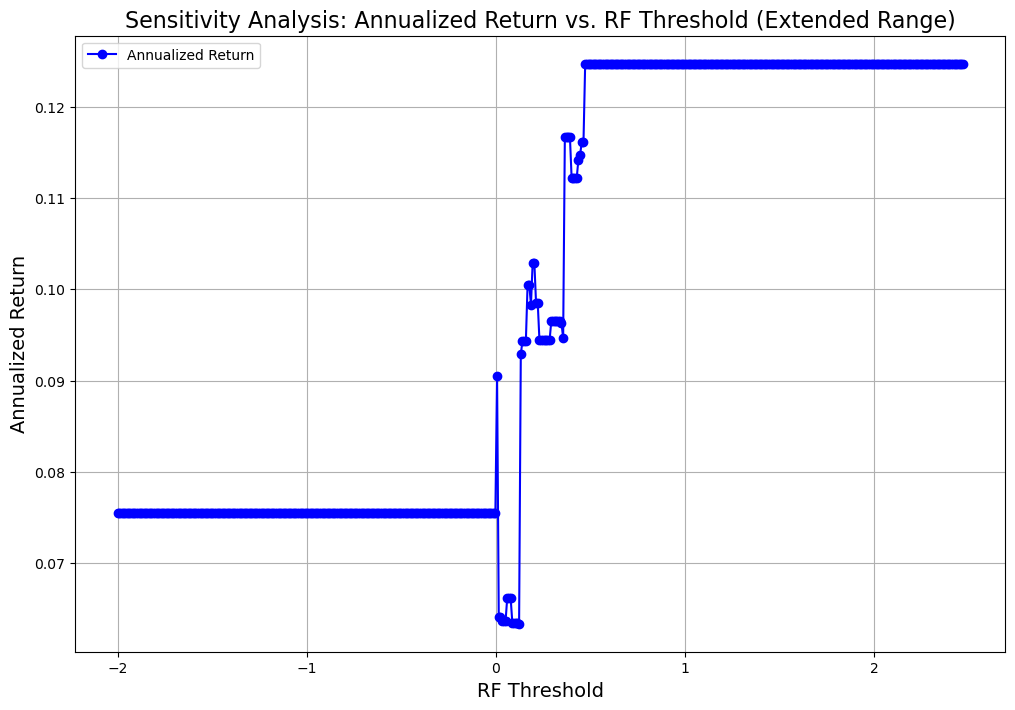

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test both in the negative and positive regions
thresholds = np.linspace(data['RF'].min() - 2, data['RF'].max() + 2, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(12, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold (Extended Range)', fontsize=16)
plt.xlabel('RF Threshold', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


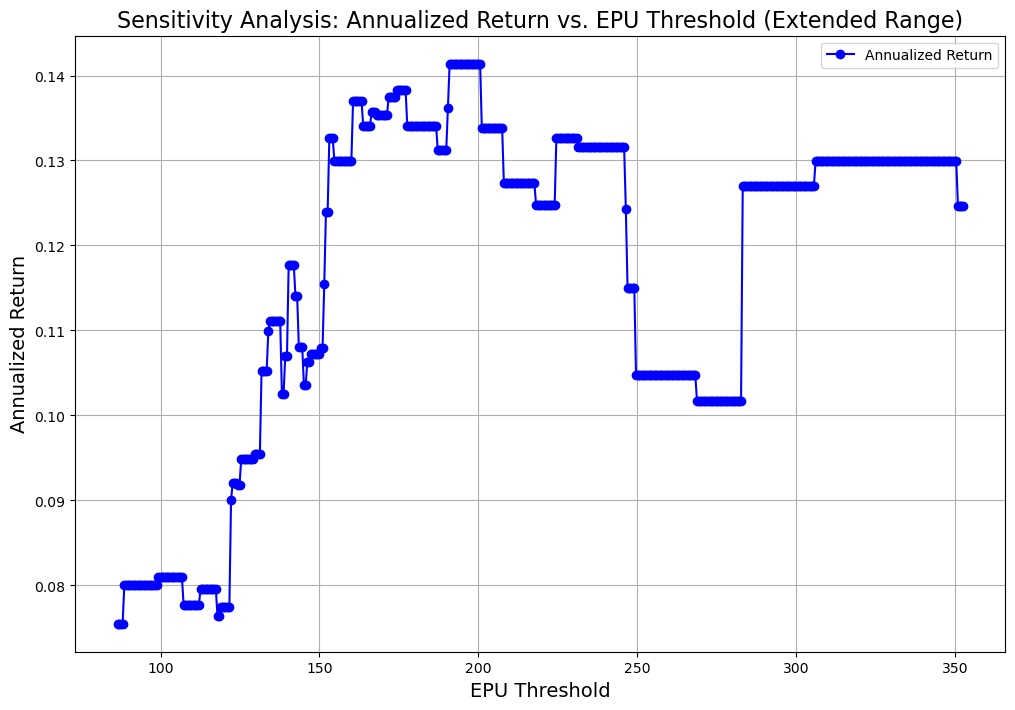

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'EPU'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['EPU'] = data['EPU'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test both in the negative and positive regions
thresholds = np.linspace(data['EPU'].min() - 2, data['EPU'].max() + 2, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's EPU value
    data['Trade Signal'] = data['EPU'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(12, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. EPU Threshold (Extended Range)', fontsize=16)
plt.xlabel('EPU Threshold', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


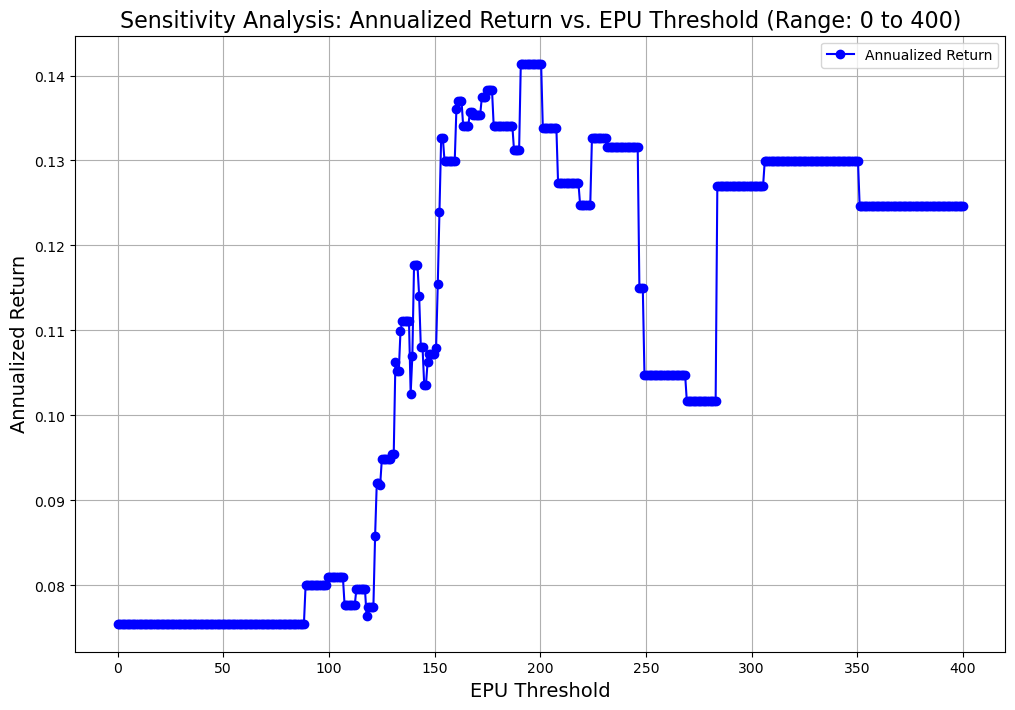

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'EPU'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['EPU'] = data['EPU'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test from 0 to 400
thresholds = np.linspace(0, 400, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's EPU value
    data['Trade Signal'] = data['EPU'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Plot the sensitivity analysis
plt.figure(figsize=(12, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. EPU Threshold (Range: 0 to 400)', fontsize=16)
plt.xlabel('EPU Threshold', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


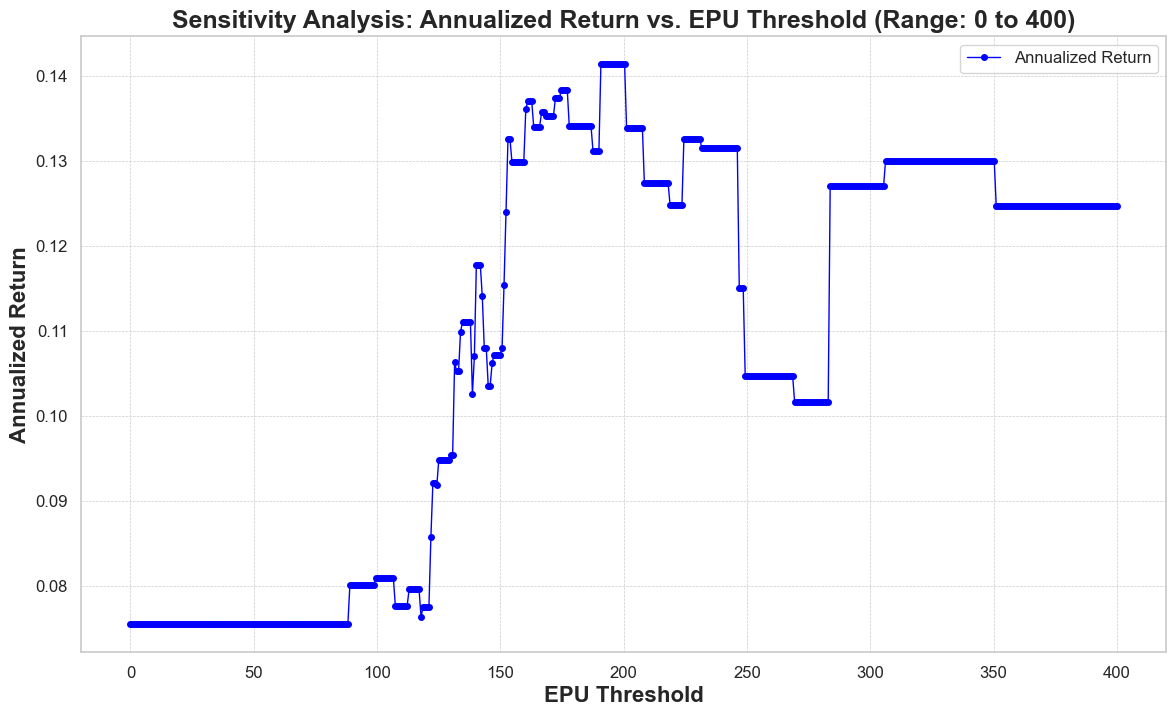

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'EPU'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['EPU'] = data['EPU'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test from 0 to 400
thresholds = np.linspace(0, 400, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's EPU value
    data['Trade Signal'] = data['EPU'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. EPU Threshold (Range: 0 to 400)', fontsize=18, fontweight='bold')
plt.xlabel('EPU Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


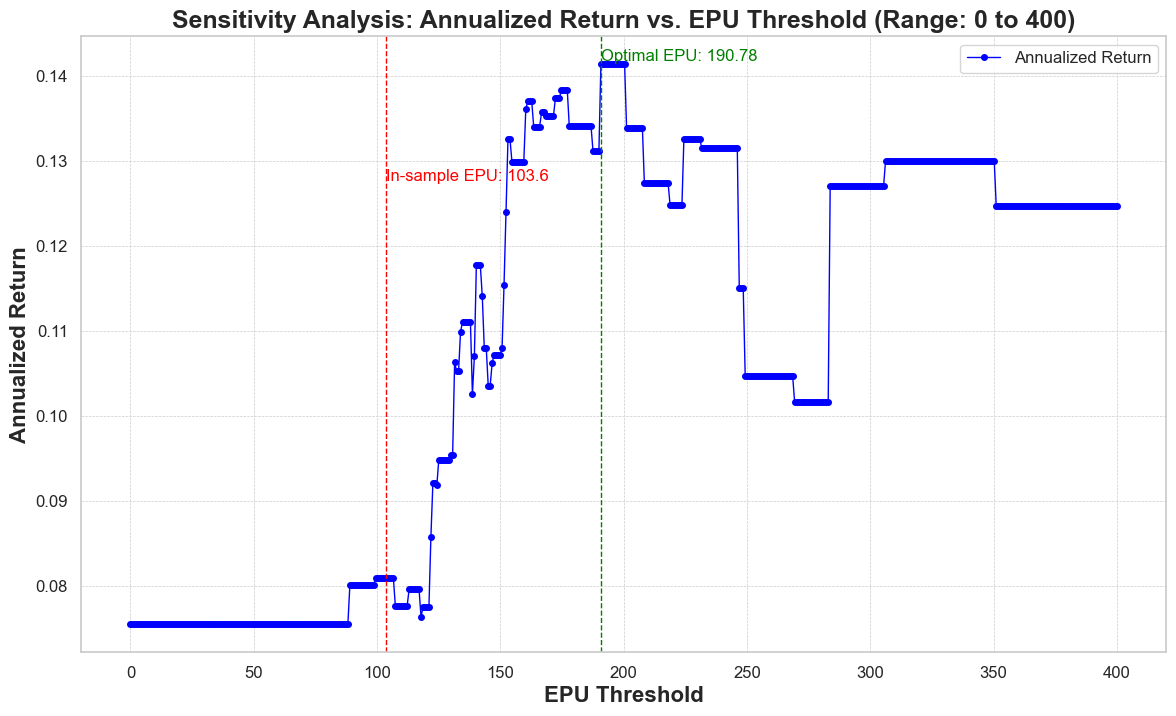

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'EPU'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['EPU'] = data['EPU'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Extend the range of thresholds to test from 0 to 400
thresholds = np.linspace(0, 400, 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's EPU value
    data['Trade Signal'] = data['EPU'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal EPU: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the in-sample threshold of 103.6
in_sample_threshold = 103.6
plt.axvline(x=in_sample_threshold, color='red', linestyle='--', linewidth=1)
plt.text(in_sample_threshold, max(annualized_returns) * 0.9, f'In-sample EPU: {in_sample_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. EPU Threshold (Range: 0 to 400)', fontsize=18, fontweight='bold')
plt.xlabel('EPU Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [67]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'MOM'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['MOM'] = data['MOM'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['MOM'].min(), data['MOM'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's MOM value
    data['Trade Signal'] = data['MOM'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold

# Print the optimal threshold and the corresponding annualized return
print(f"The best threshold for MOM is: {optimal_threshold:.2f}")
print(f"The maximum annualized return using the best threshold is: {max_annualized_return:.4f}")


The best threshold for MOM is: 7.97
The maximum annualized return using the best threshold is: 0.1247


In [69]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'MOM'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['MOM'] = data['MOM'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['MOM'].min(), data['MOM'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's MOM value
    data['Trade Signal'] = data['MOM'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for MOM is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


The best threshold for MOM is: 7.97
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [71]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'HML'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['HML'] = data['HML'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Calculate buy-and-hold strategy for Large Cap Return
data['Buy and Hold Large Cap'] = initial_investment * (1 + data['Large Cap Return']).cumprod()
buy_and_hold_large_cap_value = data['Buy and Hold Large Cap'].iloc[-1]

# Calculate buy-and-hold strategy for Small Cap Return
data['Buy and Hold Small Cap'] = initial_investment * (1 + data['Small Cap Return']).cumprod()
buy_and_hold_small_cap_value = data['Buy and Hold Small Cap'].iloc[-1]

# Define the range of thresholds to test
thresholds = np.linspace(data['HML'].min(), data['HML'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's HML value
    data['Trade Signal'] = data['HML'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for HML is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${buy_and_hold_large_cap_value:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${buy_and_hold_small_cap_value:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


The best threshold for HML is: 1.76
The final portfolio value using the best threshold is: $217701.98
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 20
The portfolio was invested in Small Cap returns for 16 periods (26.67% of the time).
The portfolio was invested in Large Cap returns for 44 periods (73.33% of the time).


In [73]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW1'].min(), data['BW1'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Threshold': thresholds,
    'Annualized Return': annualized_returns
})

# Save the results to a CSV file
results.to_csv('BW1_Threshold_Sensitivity_Analysis.csv', index=False)

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for BW1 is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


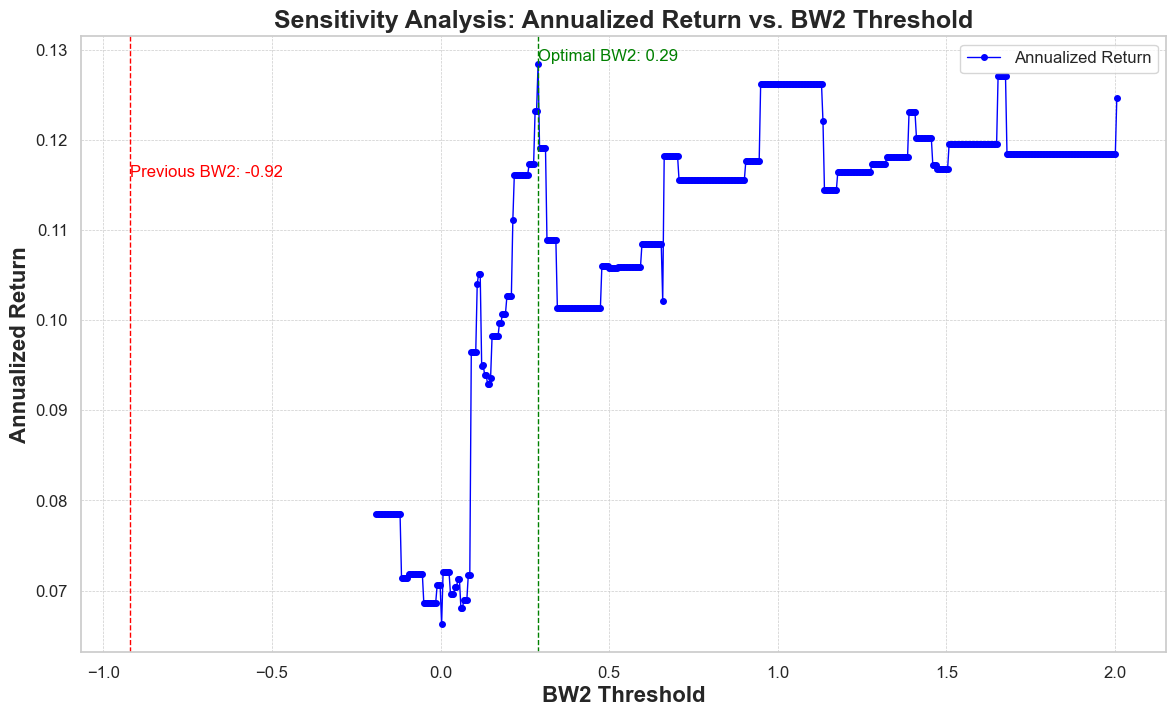

The best threshold for BW2 is: 0.29
The final portfolio value using the best threshold is: $182974.58
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 6
The portfolio was invested in Small Cap returns for 28 periods (46.67% of the time).
The portfolio was invested in Large Cap returns for 32 periods (53.33% of the time).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW2'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW2'] = data['BW2'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test
thresholds = np.linspace(data['BW2'].min(), data['BW2'].max(), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW2 value
    data['Trade Signal'] = data['BW2'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal BW2: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.92
previous_threshold = -0.92
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous BW2: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. BW2 Threshold', fontsize=18, fontweight='bold')
plt.xlabel('BW2 Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for BW2 is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


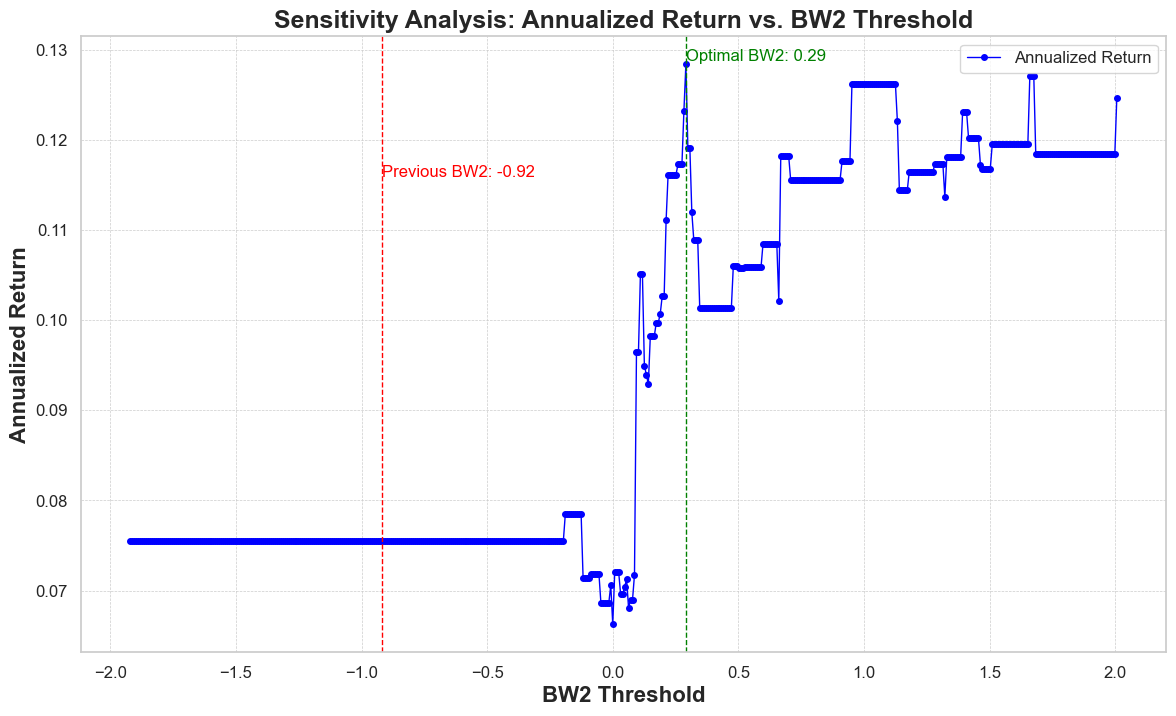

The best threshold for BW2 is: 0.29
The final portfolio value using the best threshold is: $182974.58
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 6
The portfolio was invested in Small Cap returns for 28 periods (46.67% of the time).
The portfolio was invested in Large Cap returns for 32 periods (53.33% of the time).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW2'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW2'] = data['BW2'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -0.92
thresholds = np.linspace(min(data['BW2'].min(), -0.92 - 1), max(data['BW2'].max(), -0.92 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW2 value
    data['Trade Signal'] = data['BW2'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal BW2: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.92
previous_threshold = -0.92
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous BW2: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. BW2 Threshold', fontsize=18, fontweight='bold')
plt.xlabel('BW2 Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for BW2 is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


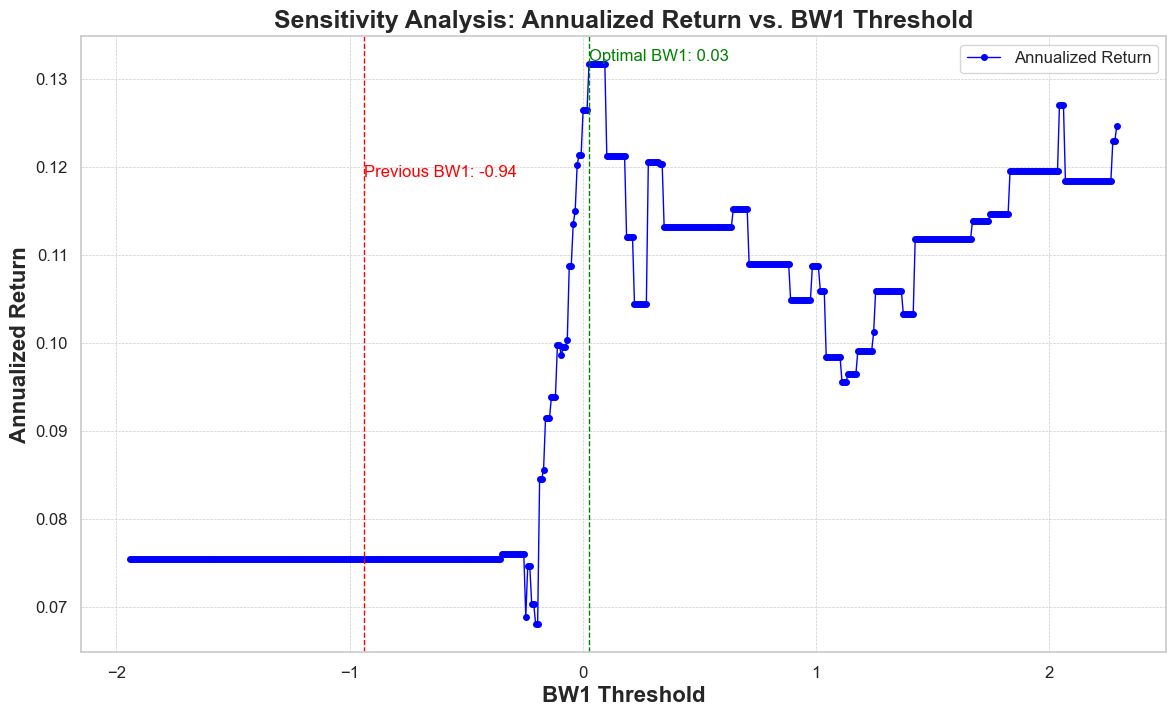

The best threshold for BW1 is: 0.03
The final portfolio value using the best threshold is: $185638.49
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 2
The portfolio was invested in Small Cap returns for 30 periods (50.00% of the time).
The portfolio was invested in Large Cap returns for 30 periods (50.00% of the time).


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'BW1'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['BW1'] = data['BW1'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -0.94
thresholds = np.linspace(min(data['BW1'].min(), -0.94 - 1), max(data['BW1'].max(), -0.94 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's BW1 value
    data['Trade Signal'] = data['BW1'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal BW1: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.94
previous_threshold = -0.94
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous BW1: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. BW1 Threshold', fontsize=18, fontweight='bold')
plt.xlabel('BW1 Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for BW1 is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


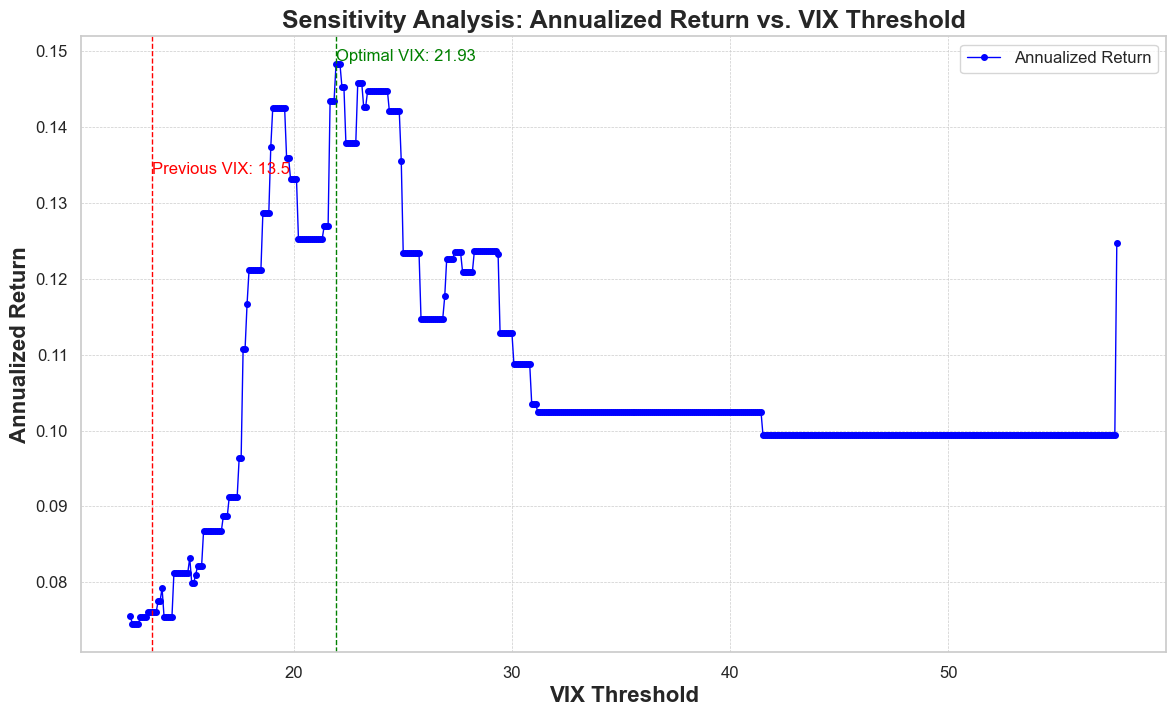

The best threshold for VIX is: 21.93
The final portfolio value using the best threshold is: $199640.35
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 4
The portfolio was invested in Small Cap returns for 23 periods (38.33% of the time).
The portfolio was invested in Large Cap returns for 37 periods (61.67% of the time).


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'VIX'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['VIX'] = data['VIX'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 13.5
thresholds = np.linspace(min(data['VIX'].min(), 13.5 - 1), max(data['VIX'].max(), 13.5 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's VIX value
    data['Trade Signal'] = data['VIX'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal VIX: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 13.5
previous_threshold = 13.5
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous VIX: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. VIX Threshold', fontsize=18, fontweight='bold')
plt.xlabel('VIX Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for VIX is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


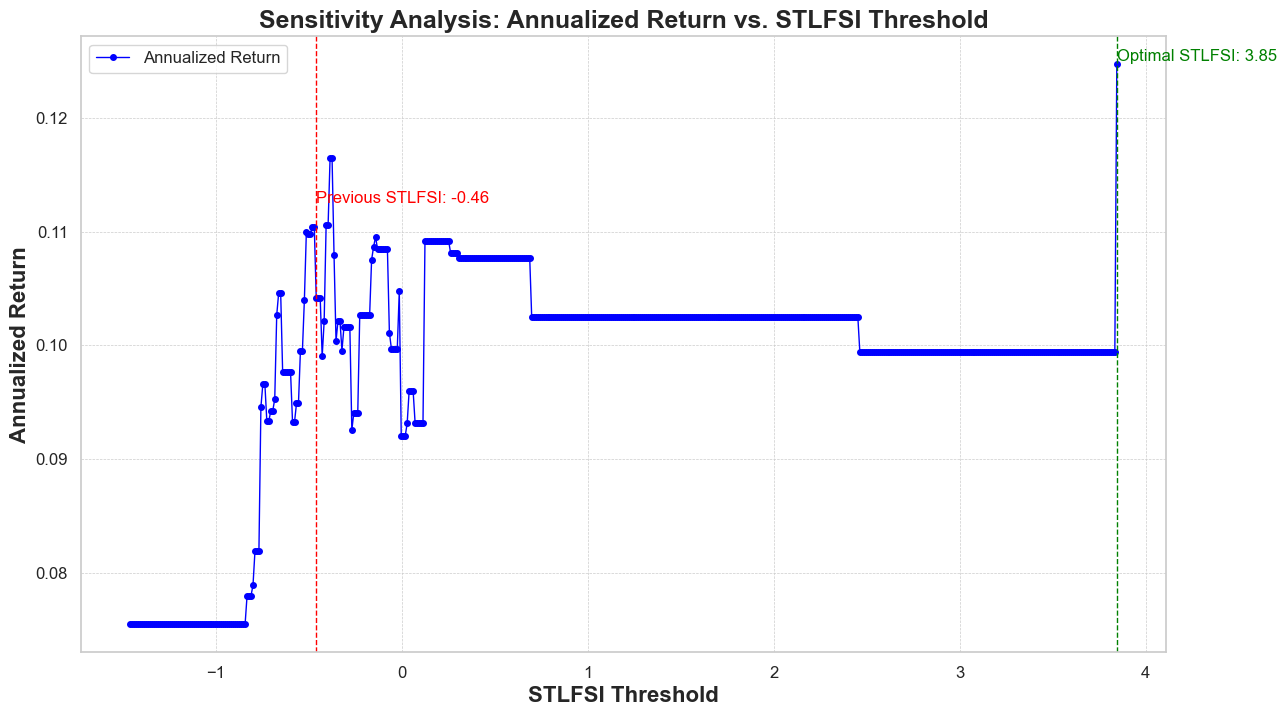

The best threshold for STLFSI is: 3.85
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'STLFSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['STLFSI'] = data['STLFSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -0.46
thresholds = np.linspace(min(data['STLFSI'].min(), -0.46 - 1), max(data['STLFSI'].max(), -0.46 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's STLFSI value
    data['Trade Signal'] = data['STLFSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal STLFSI: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.46
previous_threshold = -0.46
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous STLFSI: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. STLFSI Threshold', fontsize=18, fontweight='bold')
plt.xlabel('STLFSI Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for STLFSI is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


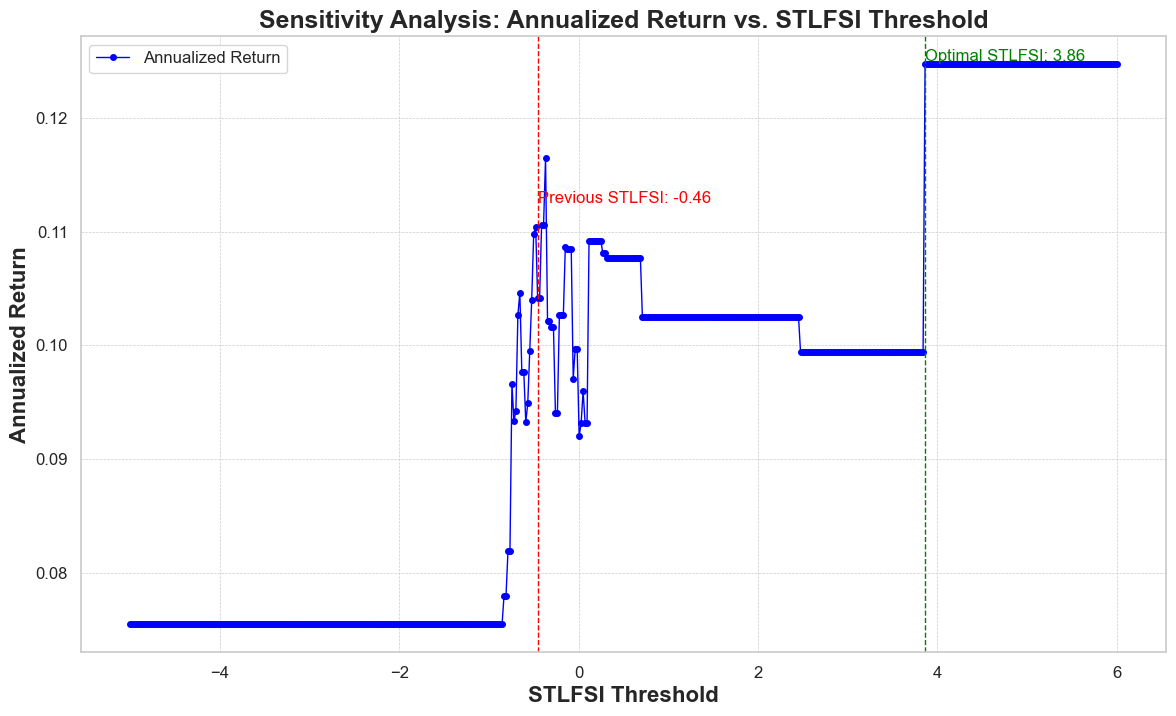

The best threshold for STLFSI is: 3.86
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'STLFSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['STLFSI'] = data['STLFSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -0.46
thresholds = np.linspace(min(data['STLFSI'].min(), -5), max(data['STLFSI'].max(), 6), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's STLFSI value
    data['Trade Signal'] = data['STLFSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal STLFSI: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.46
previous_threshold = -0.46
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous STLFSI: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. STLFSI Threshold', fontsize=18, fontweight='bold')
plt.xlabel('STLFSI Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for STLFSI is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


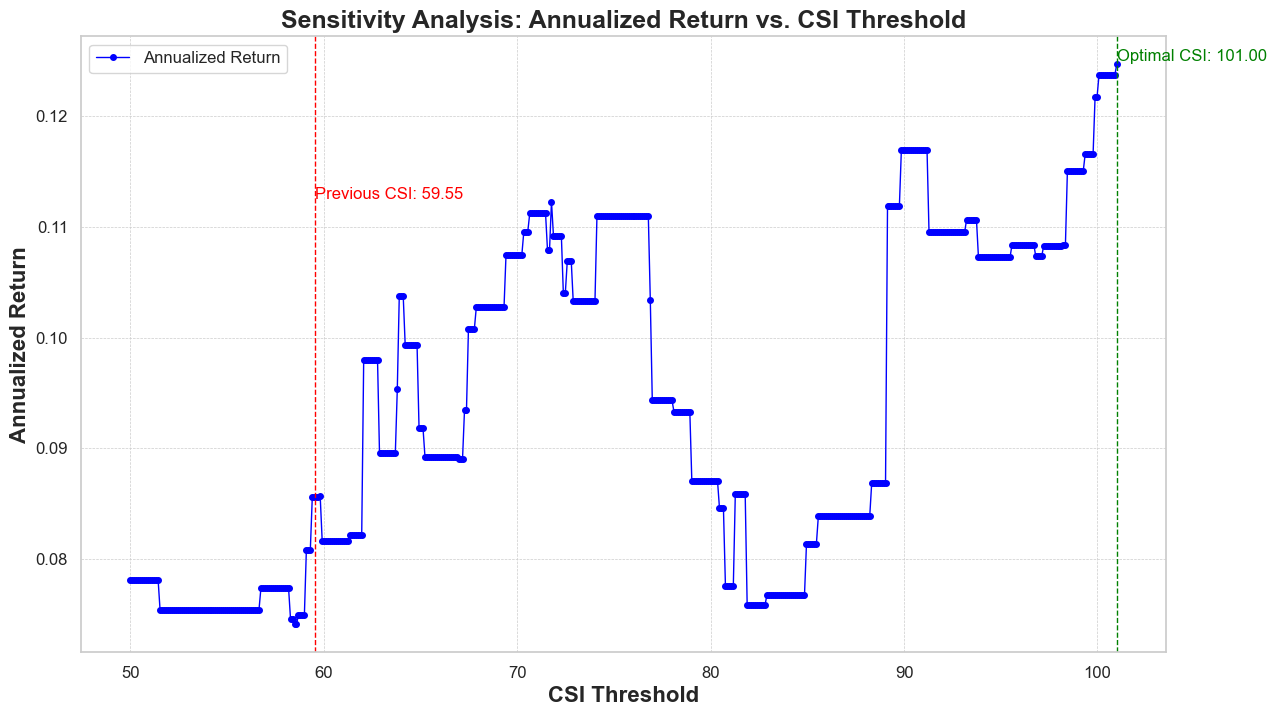

The best threshold for CSI is: 101.00
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'CSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['CSI'] = data['CSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 59.55
thresholds = np.linspace(min(data['CSI'].min(), 59.55 - 1), max(data['CSI'].max(), 59.55 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's CSI value
    data['Trade Signal'] = data['CSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal CSI: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 59.55
previous_threshold = 59.55
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous CSI: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. CSI Threshold', fontsize=18, fontweight='bold')
plt.xlabel('CSI Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for CSI is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


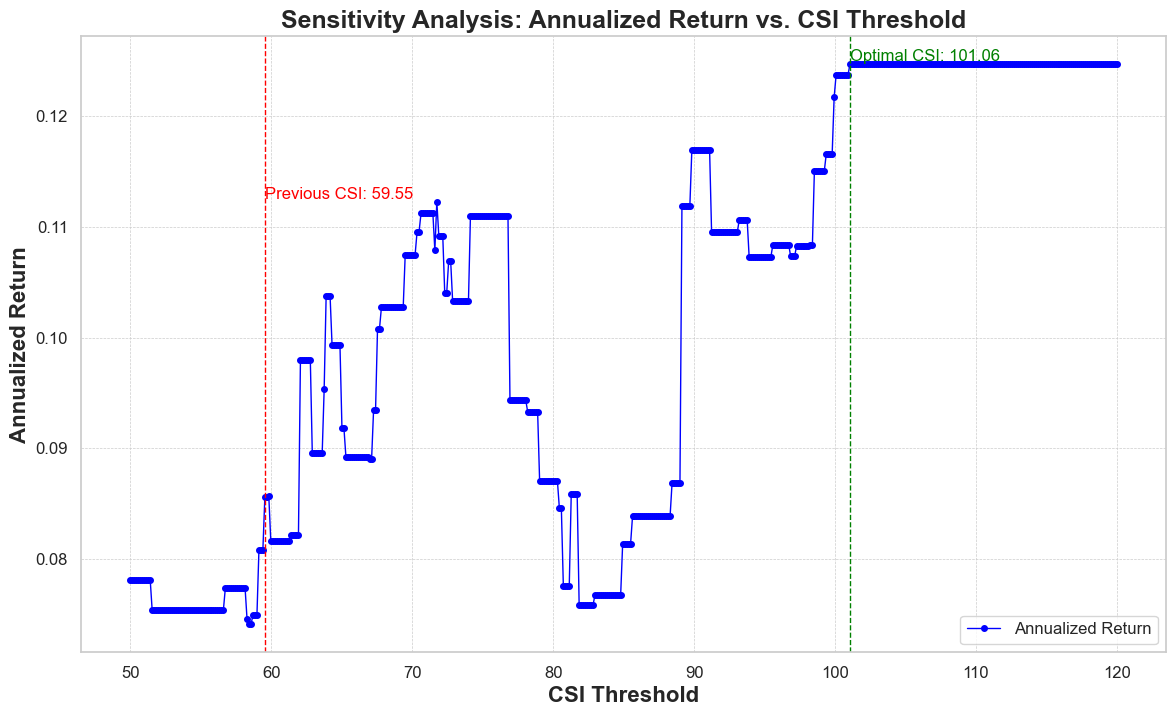

The best threshold for CSI is: 101.06
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'CSI'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['CSI'] = data['CSI'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 59.55
thresholds = np.linspace(min(data['CSI'].min(), 59.55 - 1), max(120, 59.55 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's CSI value
    data['Trade Signal'] = data['CSI'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal CSI: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 59.55
previous_threshold = 59.55
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous CSI: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. CSI Threshold', fontsize=18, fontweight='bold')
plt.xlabel('CSI Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for CSI is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


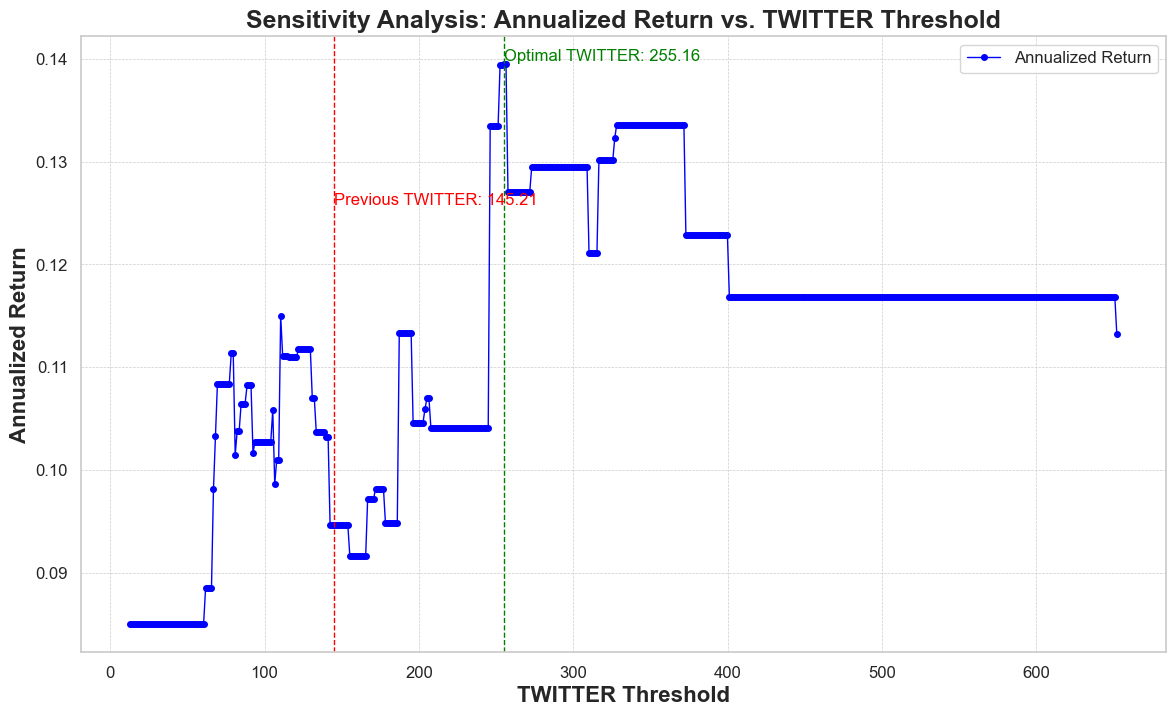

The best threshold for TWITTER is: 255.16
The final portfolio value using the best threshold is: $176074.53
Final portfolio value if only Large Cap Return was held: $159186.52
Final portfolio value if only Small Cap Return was held: $135617.51
The number of binary signals generated by the trading strategy is: 52
The number of switches between Small Cap and Large Cap returns is: 10
The portfolio was invested in Small Cap returns for 11 periods (21.15% of the time).
The portfolio was invested in Large Cap returns for 41 periods (78.85% of the time).


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'TWITTER'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['TWITTER'] = data['TWITTER'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 145.21
thresholds = np.linspace(min(data['TWITTER'].min(), 145.21 - 1), max(data['TWITTER'].max(), 145.21 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's TWITTER value
    data['Trade Signal'] = data['TWITTER'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal TWITTER: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 145.21
previous_threshold = 145.21
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous TWITTER: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. TWITTER Threshold', fontsize=18, fontweight='bold')
plt.xlabel('TWITTER Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for TWITTER is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


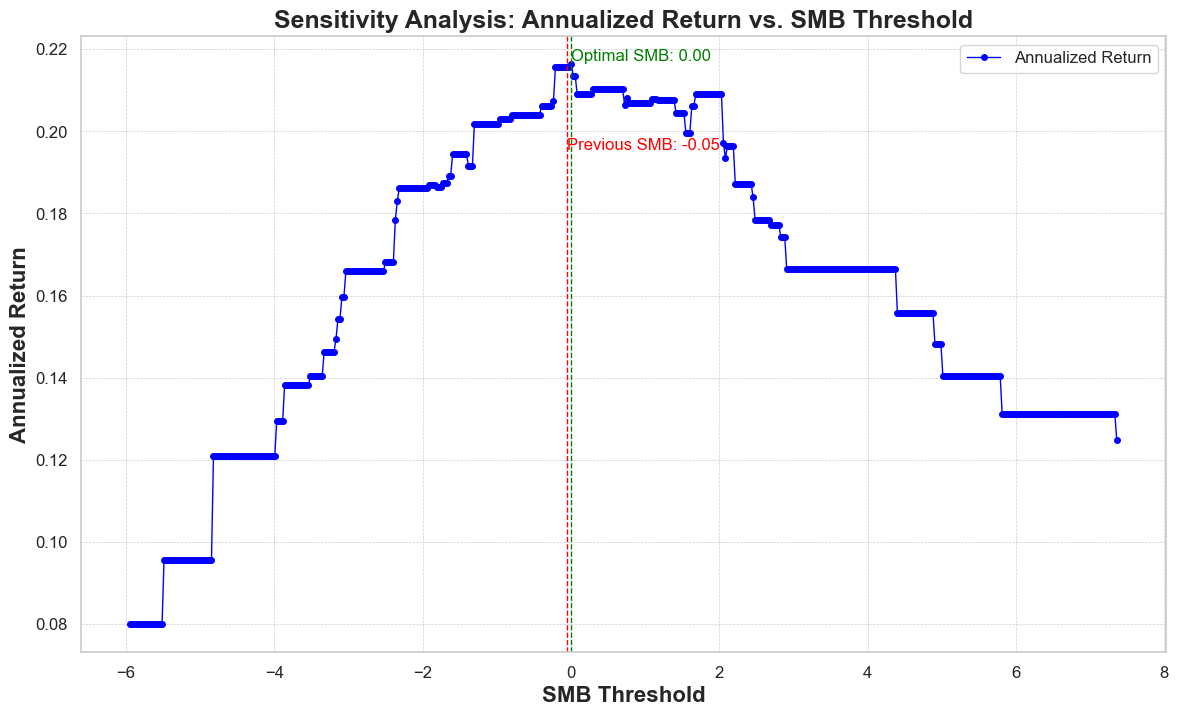

The best threshold for SMB is: 0.00
The final portfolio value using the best threshold is: $266281.34
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 26
The portfolio was invested in Small Cap returns for 28 periods (46.67% of the time).
The portfolio was invested in Large Cap returns for 32 periods (53.33% of the time).


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'SMB'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['SMB'] = data['SMB'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -0.05
thresholds = np.linspace(min(data['SMB'].min(), -0.05 - 1), max(data['SMB'].max(), -0.05 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's SMB value
    data['Trade Signal'] = data['SMB'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal SMB: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -0.05
previous_threshold = -0.05
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous SMB: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. SMB Threshold', fontsize=18, fontweight='bold')
plt.xlabel('SMB Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for SMB is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


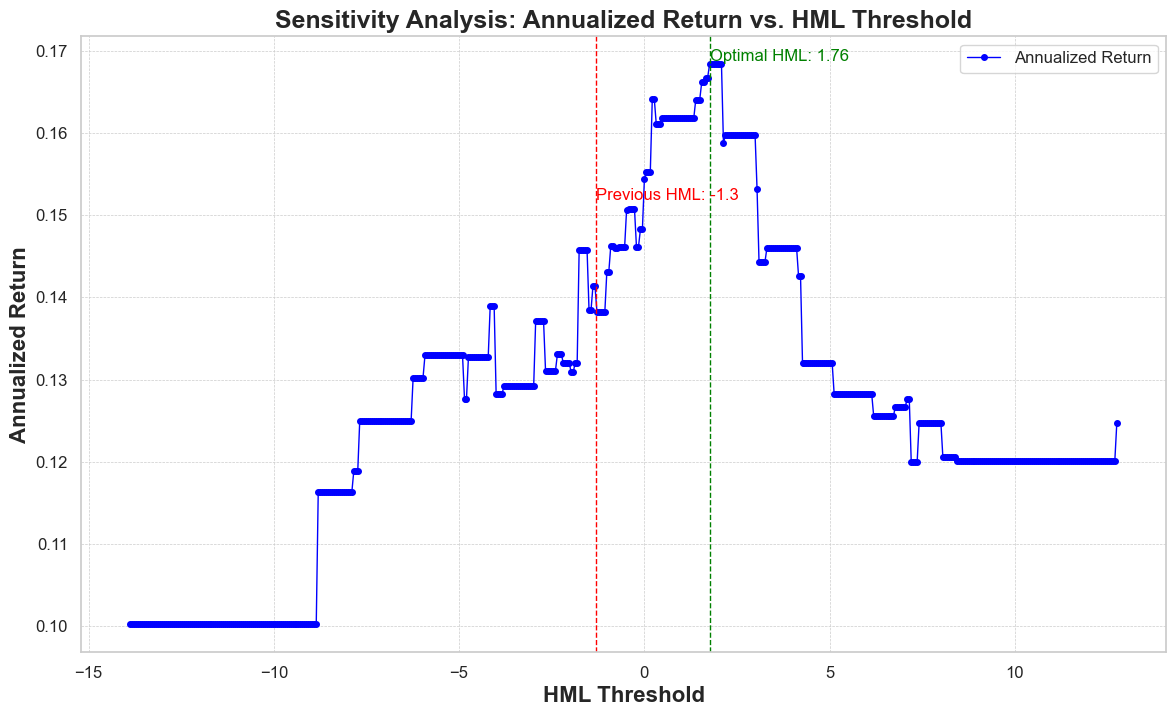

The best threshold for HML is: 1.76
The final portfolio value using the best threshold is: $217701.98
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 20
The portfolio was invested in Small Cap returns for 16 periods (26.67% of the time).
The portfolio was invested in Large Cap returns for 44 periods (73.33% of the time).


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'HML'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['HML'] = data['HML'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of -1.3
thresholds = np.linspace(min(data['HML'].min(), -1.3 - 1), max(data['HML'].max(), -1.3 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's HML value
    data['Trade Signal'] = data['HML'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal HML: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of -1.3
previous_threshold = -1.3
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous HML: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. HML Threshold', fontsize=18, fontweight='bold')
plt.xlabel('HML Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for HML is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


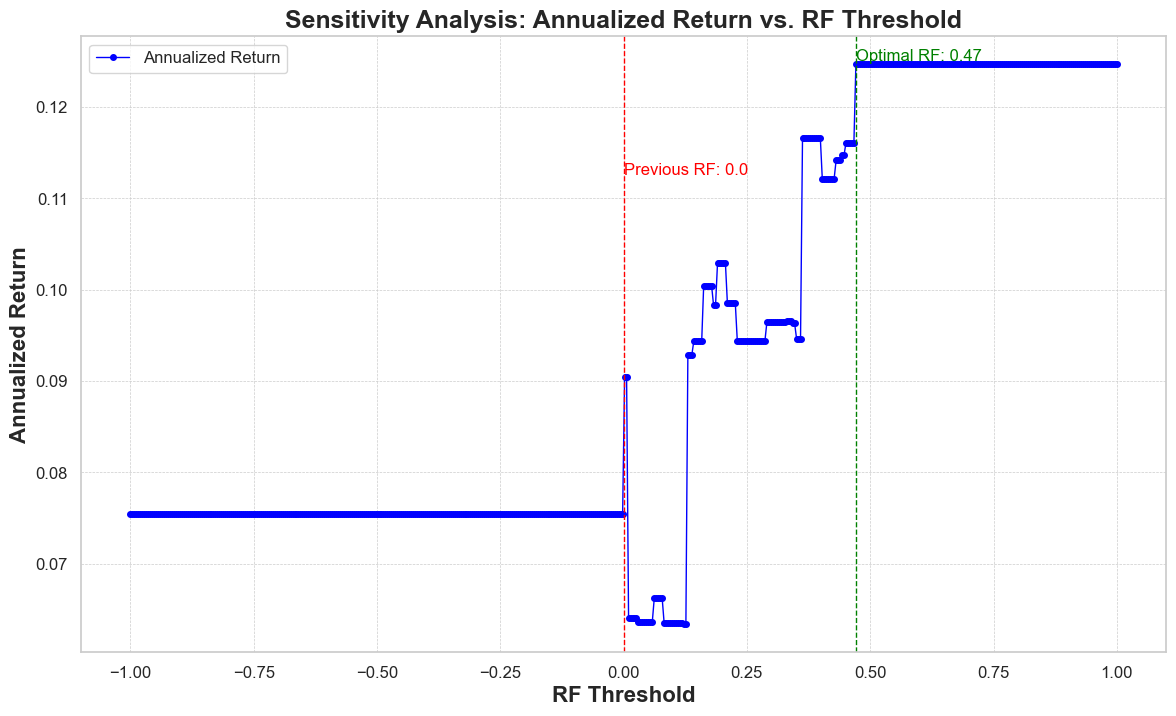

The best threshold for RF is: 0.47
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'RF'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['RF'] = data['RF'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 0.00
thresholds = np.linspace(min(data['RF'].min(), -1), max(data['RF'].max(), 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's RF value
    data['Trade Signal'] = data['RF'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal RF: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 0.00
previous_threshold = 0.00
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous RF: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. RF Threshold', fontsize=18, fontweight='bold')
plt.xlabel('RF Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for RF is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")

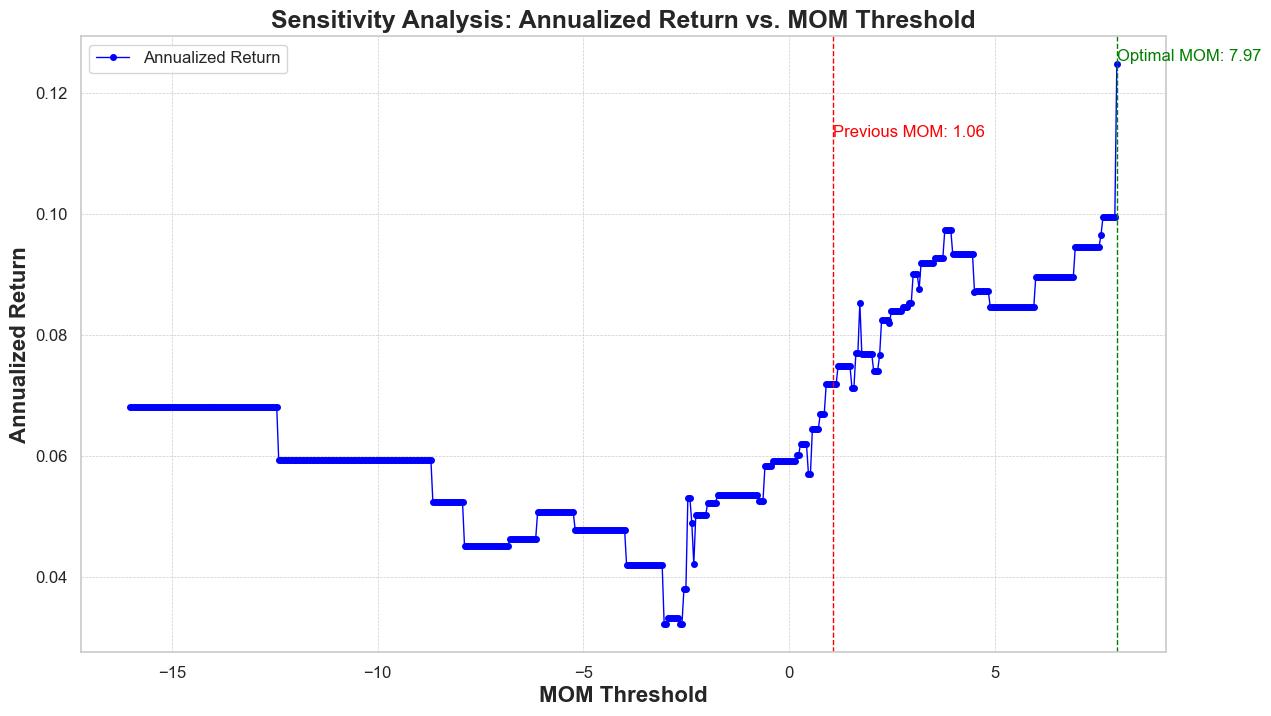

The best threshold for MOM is: 7.97
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'MOM'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['MOM'] = data['MOM'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 1.06
thresholds = np.linspace(min(data['MOM'].min(), 1.06 - 1), max(data['MOM'].max(), 1.06 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's MOM value
    data['Trade Signal'] = data['MOM'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal MOM: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 1.06
previous_threshold = 1.06
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous MOM: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. MOM Threshold', fontsize=18, fontweight='bold')
plt.xlabel('MOM Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for MOM is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")


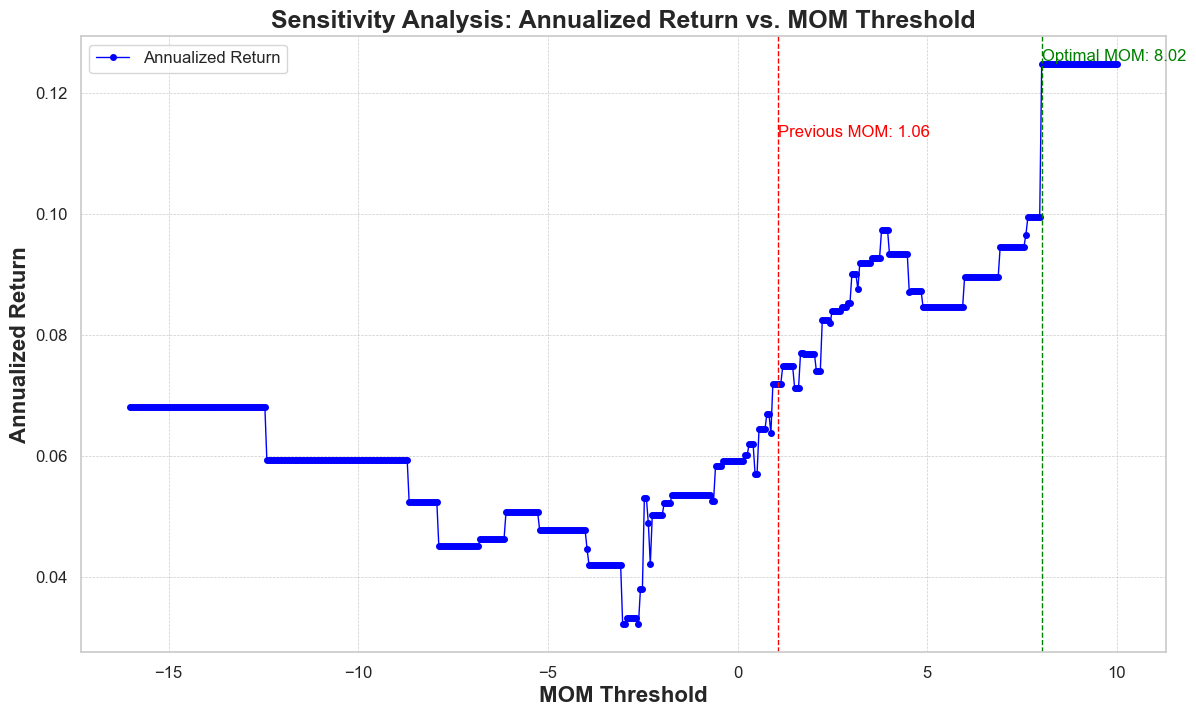

The best threshold for MOM is: 8.02
The final portfolio value using the best threshold is: $179963.54
Final portfolio value if only Large Cap Return was held: $179963.54
Final portfolio value if only Small Cap Return was held: $140202.01
The number of binary signals generated by the trading strategy is: 60
The number of switches between Small Cap and Large Cap returns is: 0
The portfolio was invested in Small Cap returns for 0 periods (0.00% of the time).
The portfolio was invested in Large Cap returns for 60 periods (100.00% of the time).


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Thresholdtesting.csv")
data.dropna(subset=['Small Cap Return', 'Large Cap Return', 'MOM'], inplace=True)
data['Small Cap Return'] = data['Small Cap Return'].ffill()
data['Large Cap Return'] = data['Large Cap Return'].ffill()
data['MOM'] = data['MOM'].ffill()

# Convert returns from percentages to decimals if necessary
data['Small Cap Return'] = data['Small Cap Return'] / 100
data['Large Cap Return'] = data['Large Cap Return'] / 100

# Define initial portfolio value
initial_investment = 100000  # $100,000

# Define the range of thresholds to test, ensuring it includes the previous threshold of 1.06
thresholds = np.linspace(min(data['MOM'].min(), 1.06 - 1), max(10, 1.06 + 1), 500)

# Store annualized returns for each threshold
annualized_returns = []

# Calculate the number of years in the dataset (since the data is monthly)
num_months = len(data)
num_years = num_months / 12

# Variables to store the optimal threshold and its return
optimal_threshold = None
max_annualized_return = -np.inf

# Variables to store the best trade signals and portfolio value
best_trade_signals = None
best_portfolio_value = None

# Perform grid search to find the optimal threshold and calculate annualized return
for threshold in thresholds:
    # Generate trade signals based on the previous period's MOM value
    data['Trade Signal'] = data['MOM'].shift(1).apply(lambda x: 1 if x > threshold else 0)
    
    # Select returns based on the trade signal, defaulting to Large Cap Return
    data['Selected Return'] = data.apply(
        lambda row: row['Small Cap Return'] if row['Trade Signal'] == 1 else row['Large Cap Return'], axis=1)
    
    # Calculate the strategy returns
    data['Strategy Return'] = data['Selected Return']
    
    # Calculate the portfolio value over time
    data['Portfolio Value'] = initial_investment * (1 + data['Strategy Return']).cumprod()
    
    # Get the final portfolio value
    final_portfolio_value = data['Portfolio Value'].iloc[-1]
    
    # Calculate the annualized return
    annualized_return = (final_portfolio_value / initial_investment) ** (12 / num_months) - 1
    annualized_returns.append(annualized_return)
    
    # Check if this is the maximum annualized return
    if annualized_return > max_annualized_return:
        max_annualized_return = annualized_return
        optimal_threshold = threshold
        best_trade_signals = data['Trade Signal'].copy()
        best_portfolio_value = final_portfolio_value

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the sensitivity analysis
plt.figure(figsize=(14, 8))

# Plot the annualized returns
plt.plot(thresholds, annualized_returns, label='Annualized Return', color='blue', linestyle='-', marker='o', linewidth=1, markersize=4)

# Add a visual cue for the optimal threshold
plt.axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=1)
plt.text(optimal_threshold, max(annualized_returns), f'Optimal MOM: {optimal_threshold:.2f}', color='green', fontsize=12, verticalalignment='bottom')

# Add a visual cue for the previously used threshold of 1.06
previous_threshold = 1.06
plt.axvline(x=previous_threshold, color='red', linestyle='--', linewidth=1)
plt.text(previous_threshold, max(annualized_returns) * 0.9, f'Previous MOM: {previous_threshold}', color='red', fontsize=12, verticalalignment='bottom')

# Add titles and labels
plt.title('Sensitivity Analysis: Annualized Return vs. MOM Threshold', fontsize=18, fontweight='bold')
plt.xlabel('MOM Threshold', fontsize=16, fontweight='bold')
plt.ylabel('Annualized Return', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Calculate the number of binary signals generated
num_signals = best_trade_signals.count()

# Calculate the number of switches between Small Cap and Large Cap returns
num_switches = (best_trade_signals.diff().abs() == 1).sum()

# Calculate the average composition of the portfolio
num_small_cap = (best_trade_signals == 1).sum()
num_large_cap = (best_trade_signals == 0).sum()
total_periods = len(best_trade_signals)

# Print the results
print(f"The best threshold for MOM is: {optimal_threshold:.2f}")
print(f"The final portfolio value using the best threshold is: ${best_portfolio_value:.2f}")
print(f"Final portfolio value if only Large Cap Return was held: ${initial_investment * (1 + data['Large Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"Final portfolio value if only Small Cap Return was held: ${initial_investment * (1 + data['Small Cap Return']).cumprod().iloc[-1]:.2f}")
print(f"The number of binary signals generated by the trading strategy is: {num_signals}")
print(f"The number of switches between Small Cap and Large Cap returns is: {num_switches}")
print(f"The portfolio was invested in Small Cap returns for {num_small_cap} periods ({num_small_cap / total_periods:.2%} of the time).")
print(f"The portfolio was invested in Large Cap returns for {num_large_cap} periods ({num_large_cap / total_periods:.2%} of the time).")
